### Milestone 2 -- Data for my project

#### I have chosen to utilize crime statisitics provided by the Omaha Police Department as my first dataset. The data, which is publicly available in csv format on the <a href="https://police.cityofomaha.org/crime-information/incident-data-download" target="_blank" rel="noopener">Omaha Policy Department's website</a>, dates back from 2015 to present day. 2015 and September 2023 is only partial data so I will be removing each of those portions.

#### The data contains information about the date/time of incidents, their location (both physical street address and lat/long), a description of the incident, the police district in which it occurred, along with the incident number.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv("/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2023.csv")

df = pd.concat(
    map(pd.read_csv, ['/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2016.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2017.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2018.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2019.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2020.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2021.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2022.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2023.csv']), ignore_index=True)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df.head()

,RB Number,Reported Date,Reported Time,Statute/Ordinance Description,Occurred Location,Occurred District,Occurred Block LAT,Occurred Block LON
0,AH45311,01/01/2016,15:21:16,ASSAULT - FELONY - AGGRAVATED,S 75th St & Mercy Rd,76,41.237913,-96.028724
1,AH45330,01/01/2016,00:11:46,DOMESTIC ASSAULT,5900 Grover St,72,41.227057,-96.003686
2,AH45336,01/01/2016,00:20:24,ASSAULT - MISDEMEANOR - NO WEAPON,4700 N 39th St,37,41.301427,-95.971064
3,AH45339,01/01/2016,01:08:31,PROT ORD-DOMESTIC ABUSE-1ST OFFENSE,10900 Cottonwood Plz,12,41.286141,-96.082313
4,AH45340,01/01/2016,03:10:26,ASSAULT - MISDEMEANOR - NO WEAPON,N 36th St & Ames Ave,31,41.299533,-95.966181


In [3]:
df = df.rename(columns={"RB Number": "incident_number", "Reported Date": "incident_date", "Reported Time": "incident_time",
                   "Statute/Ordinance Description": "incident_description", "Occurred Location": "incident_location",
                   "Occurred District": "incident_district", "Occurred Block LAT": "incident_lat",
                   "Occurred Block LON": "incident_long"})
df.head()

,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long
0,AH45311,01/01/2016,15:21:16,ASSAULT - FELONY - AGGRAVATED,S 75th St & Mercy Rd,76,41.237913,-96.028724
1,AH45330,01/01/2016,00:11:46,DOMESTIC ASSAULT,5900 Grover St,72,41.227057,-96.003686
2,AH45336,01/01/2016,00:20:24,ASSAULT - MISDEMEANOR - NO WEAPON,4700 N 39th St,37,41.301427,-95.971064
3,AH45339,01/01/2016,01:08:31,PROT ORD-DOMESTIC ABUSE-1ST OFFENSE,10900 Cottonwood Plz,12,41.286141,-96.082313
4,AH45340,01/01/2016,03:10:26,ASSAULT - MISDEMEANOR - NO WEAPON,N 36th St & Ames Ave,31,41.299533,-95.966181


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384470 entries, 0 to 384469
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   incident_number       384470 non-null  object 
 1   incident_date         384470 non-null  object 
 2   incident_time         384470 non-null  object 
 3   incident_description  384470 non-null  object 
 4   incident_location     384305 non-null  object 
 5   incident_district     384470 non-null  int64  
 6   incident_lat          309422 non-null  float64
 7   incident_long         309422 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.5+ MB


#### Each district in which an incident occurs belongs to one of five segmented precincts:
    -Northwest
    -Northeast
    -Southwest
    -Southeast
    -West

#### I want to add a column that identifies each incident's precinct based on the district so that I may use it for EDA:

In [5]:
precinct = []

for row in df['incident_district']:
    if row in range(11,30): precinct.append('NW') # note range(inclusive, exclusive)
    elif row in range(31, 50) : precinct.append('NE')
    elif row in range(51, 69) : precinct.append('SE')
    elif row in range(71, 90) : precinct.append('SW')
    elif row in range(91, 108) : precinct.append('W')
    else: precinct.append('No Precinct')

df['incident_precinct'] = precinct

df.head()

,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,incident_precinct
0,AH45311,01/01/2016,15:21:16,ASSAULT - FELONY - AGGRAVATED,S 75th St & Mercy Rd,76,41.237913,-96.028724,SW
1,AH45330,01/01/2016,00:11:46,DOMESTIC ASSAULT,5900 Grover St,72,41.227057,-96.003686,SW
2,AH45336,01/01/2016,00:20:24,ASSAULT - MISDEMEANOR - NO WEAPON,4700 N 39th St,37,41.301427,-95.971064,NE
3,AH45339,01/01/2016,01:08:31,PROT ORD-DOMESTIC ABUSE-1ST OFFENSE,10900 Cottonwood Plz,12,41.286141,-96.082313,NW
4,AH45340,01/01/2016,03:10:26,ASSAULT - MISDEMEANOR - NO WEAPON,N 36th St & Ames Ave,31,41.299533,-95.966181,NE


              count  percent
NW           103730     27.0
SW            79459     20.7
SE            78016     20.3
NE            75120     19.5
W             36884      9.6
No Precinct   11261      2.9


<Axes: title={'center': 'incident_precinct'}>

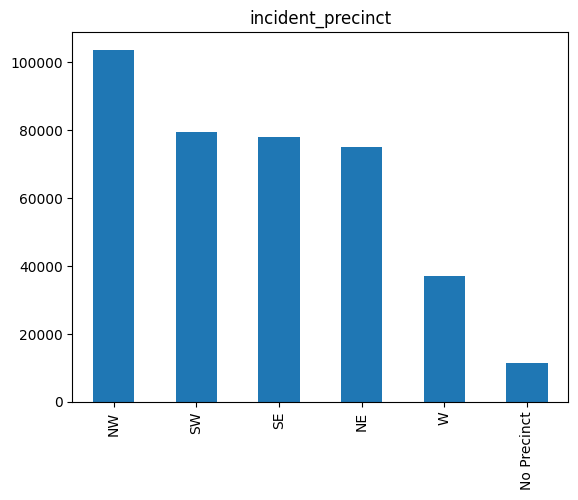

In [6]:
feature = 'incident_precinct'
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
feature_df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(feature_df)
count.plot(kind='bar', title=feature)

#### The 'No Precinct' results above generate from where the incident_district is labeled either 998 or 999 because there is incident_location indicated (entered as 'Unknown'). Because of this, I will separate these results from our dataframe but maintain in order to document how often incomplete incidents are being added.

In [7]:
complete_df = df[df['incident_precinct'] != 'No Precinct']
incomplete_df = df[df['incident_precinct'] == 'No Precinct']
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373209 entries, 0 to 384469
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   incident_number       373209 non-null  object 
 1   incident_date         373209 non-null  object 
 2   incident_time         373209 non-null  object 
 3   incident_description  373209 non-null  object 
 4   incident_location     373112 non-null  object 
 5   incident_district     373209 non-null  int64  
 6   incident_lat          309269 non-null  float64
 7   incident_long         309269 non-null  float64
 8   incident_precinct     373209 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 28.5+ MB


#### Now I will review the various types of crimes to look for patterns by type and the precincts in which they occur.

In [8]:
print(complete_df["incident_description"].nunique())

254


In [9]:
temp = pd.crosstab(complete_df['incident_description'], complete_df['incident_precinct'], margins=True, margins_name='Total')
temp

incident_precinct,NE,NW,SE,SW,W,Total
incident_description,,,,,,
ABUSE VULNERABLE ADULT -EXPLOIT; FRAUD,22,31,23,24,19,119
"ABUSE VULNERABLE ADULT, KNOW & INTENT",6,8,4,10,4,32
AGG ASLT OFFICER/HEALTH CARE WORKER,0,8,8,5,2,23
ANIMAL BITE,67,79,55,42,16,259
ARSON,190,104,104,66,17,481
...,...,...,...,...,...,...
"UNLAWFUL ENTRY/THEFT -GARAGE, OTHER",122,457,151,482,253,1465
UNLAWFUL OCCUPANCY,52,39,82,32,5,210
VIOLATION OF CUSTODY,2,3,2,0,0,7


In [10]:
incident_description_feature = 'incident_description'
incident_description_count = complete_df[incident_description_feature].value_counts()
percent = 100*complete_df[incident_description_feature].value_counts(normalize=True)
incident_description_feature_df = pd.DataFrame({'count':incident_description_count, 'percent':percent.round(3)})
incident_description_feature_df



,count,percent
CRIMINAL MISCHIEF UNDER $500,32987,8.839
THEFT BY UNLAWFUL TAKING $200-$1499,25746,6.899
ASSAULT - MISDEMEANOR - NO WEAPON,23916,6.408
THEFT OF MOTOR VEHICLE - FELONY MV,22793,6.107
THEFT BY SHOPLIFT $500/LESS,20356,5.454
...,...,...
COMPUTER-UNAUTHOR ACCESS-UND $1000-ATT,1,0.000
MANSLAUGHTER,1,0.000
FAIL RET LEAS PRP $200/LESS -ATMPT,1,0.000
SELLING STOLEN PROPERTY,1,0.000


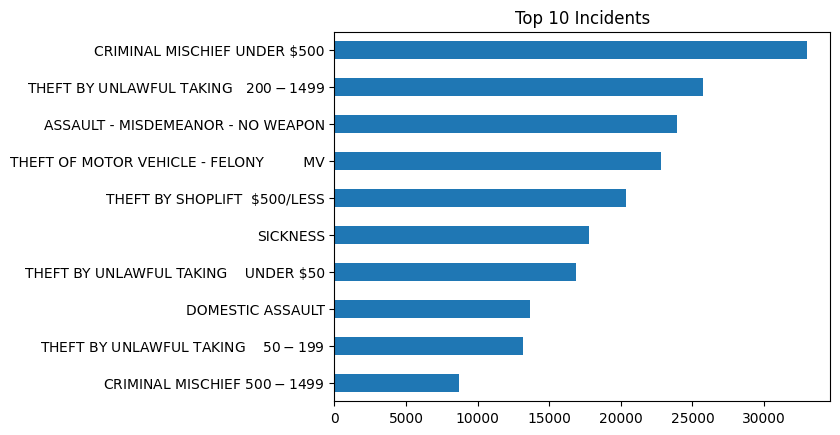

In [11]:
incident_description_count.head(10).plot(kind='barh', title="Top 10 Incidents")
plt.gca().invert_yaxis()

#### Now I'm going to group the data by month and year to see if there are any trends year over year.

In [14]:
complete_df['incident_date'] = pd.to_datetime(complete_df['incident_date'])
crime_by_month = complete_df.groupby(pd.Grouper(key='incident_date', freq='M')).count()
crime_by_month.reset_index(inplace=True)
crime_by_month

<ipython-input-14-709e1a364992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['incident_date'] = pd.to_datetime(complete_df['incident_date'])


,incident_date,incident_number,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,incident_precinct
0,2016-01-31,3533,3533,3533,3533,3533,3421,3421,3533
1,2016-02-29,3212,3212,3212,3212,3212,3116,3116,3212
2,2016-03-31,3582,3582,3582,3582,3582,3462,3462,3582
3,2016-04-30,3589,3589,3589,3589,3589,3467,3467,3589
4,2016-05-31,4012,4012,4012,4012,4012,3848,3848,4012
...,...,...,...,...,...,...,...,...,...
88,2023-05-31,4716,4716,4716,4709,4716,4679,4679,4716
89,2023-06-30,4659,4659,4659,4654,4659,4618,4618,4659
90,2023-07-31,5273,5273,5273,5264,5273,5224,5224,5273
91,2023-08-31,4727,4727,4727,4715,4727,4672,4672,4727


In [16]:
crime_by_month.drop(crime_by_month[crime_by_month['incident_date'] == '2023-09-30'].index, inplace=True)

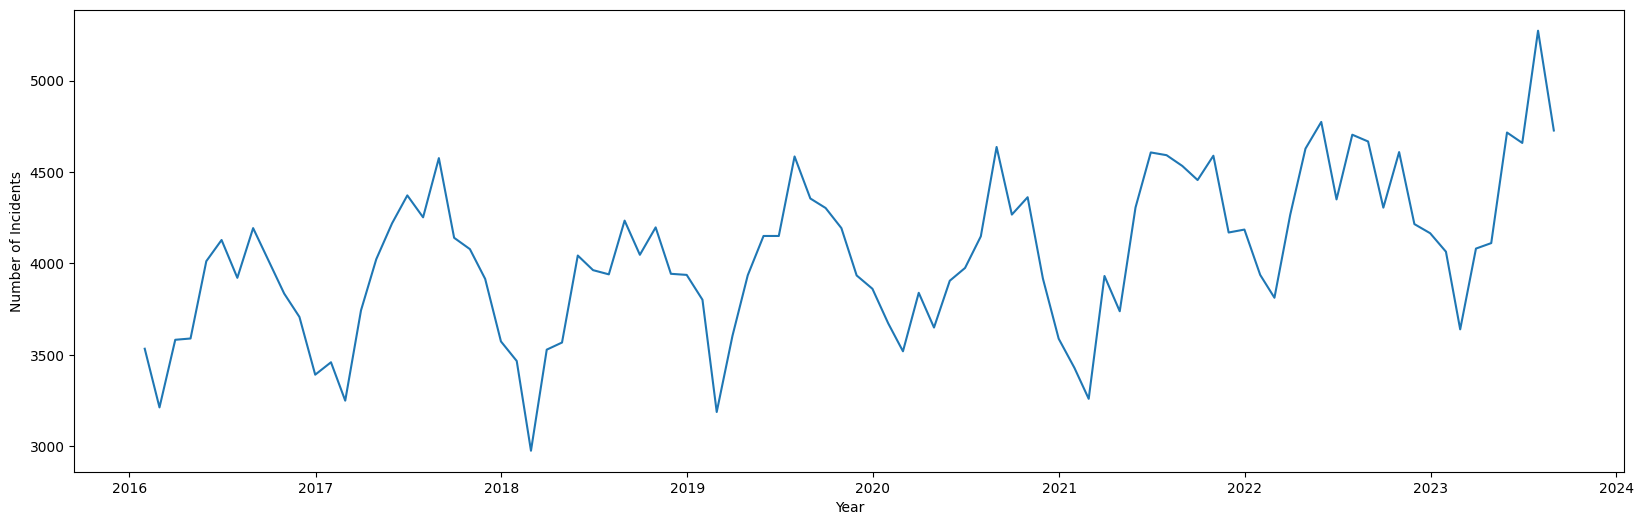

In [17]:
plt.figure(figsize=(20,6))
plt.plot(crime_by_month['incident_date'], crime_by_month['incident_number'])
plt.xlabel("Year")
plt.ylabel("Number of Incidents")

plt.show()

#### There is clearly some sort of trend as far as the ebb and flow of the number of incidents. A first guess would be due to seasonality -- namely weather, and temperature. Also, it doesn't appear there was any spike due to COVID-19 from 2020-2022. Now I'll import the average temperature (from the <a href="https://www.weather.gov/wrh/Climate?wfo=oax">NOAA/NWS website</a>) - each month to compare that to the figure above to see if there's a relationship.

In [18]:
temperature_df = pd.read_csv("/content/drive/My Drive/DSC410-T301_Predictive_Analytics/omaha_temperature_data.csv")
temperature_df = temperature_df.set_index('Year')
temperature_df = temperature_df.drop(columns=['Annual'])
temperature_df


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2016,24.3,34.2,47.5,55.0,63.1,78.7,77.8,75.9,70.8,58.9,47.3,26.9
2017,27.7,37.7,43.3,54.4,63.1,75.7,80.1,72.5,70.6,55.3,40.7,27.4
2018,23.3,24.0,40.3,44.9,70.6,77.6,77.5,76.0,69.4,51.6,33.7,29.6
2019,24.5,17.6,35.5,54.9,62.0,74.2,78.6,75.4,73.6,49,37.4,32.3
2020,26.4,30.8,44.1,51.1,59.8,78.1,79.2,77.2,65.7,49.5,44,29.7
2021,28.5,16.3,46.1,53.2,62.1,77.7,77.7,78.0,71,57.9,44.5,35.9
2022,22.8,28.3,40.7,50.2,64.7,75.0,78.2,76.7,68.9,54.2,37.6,24.3
2023,26.8,30.2,36.5,52.9,66.8,75.5,75.6,76.5,M,M,M,M


In [19]:
#temperature_df = temperature_df.stack()
temperature_df.columns = range(1,13)
s = temperature_df.stack()
year = s.index.get_level_values(0).values
month = s.index.get_level_values(1).values
pd.PeriodIndex(year=year, month=month, freq='M')
s.index = pd.PeriodIndex(year=year, month=month, freq='M')

temperature_df = pd.DataFrame(s)
temperature_df

,0
2016-01,24.3
2016-02,34.2
2016-03,47.5
2016-04,55.0
2016-05,63.1
...,...
2023-08,76.5
2023-09,M
2023-10,M
2023-11,M


In [21]:
#temperature_df = temperature_df.reset_index().rename(columns={0: "temp", "index": "date"})

temperature_df['date'] = temperature_df['date'].astype(str)
temperature_df['date'] = pd.to_datetime(temperature_df['date'])
temperature_df.drop(temperature_df[temperature_df['temp'] == "M"].index, inplace=True)
temperature_df['temp'] = temperature_df['temp'].astype(float)
temperature_df.dtypes


date    datetime64[ns]
temp           float64
dtype: object

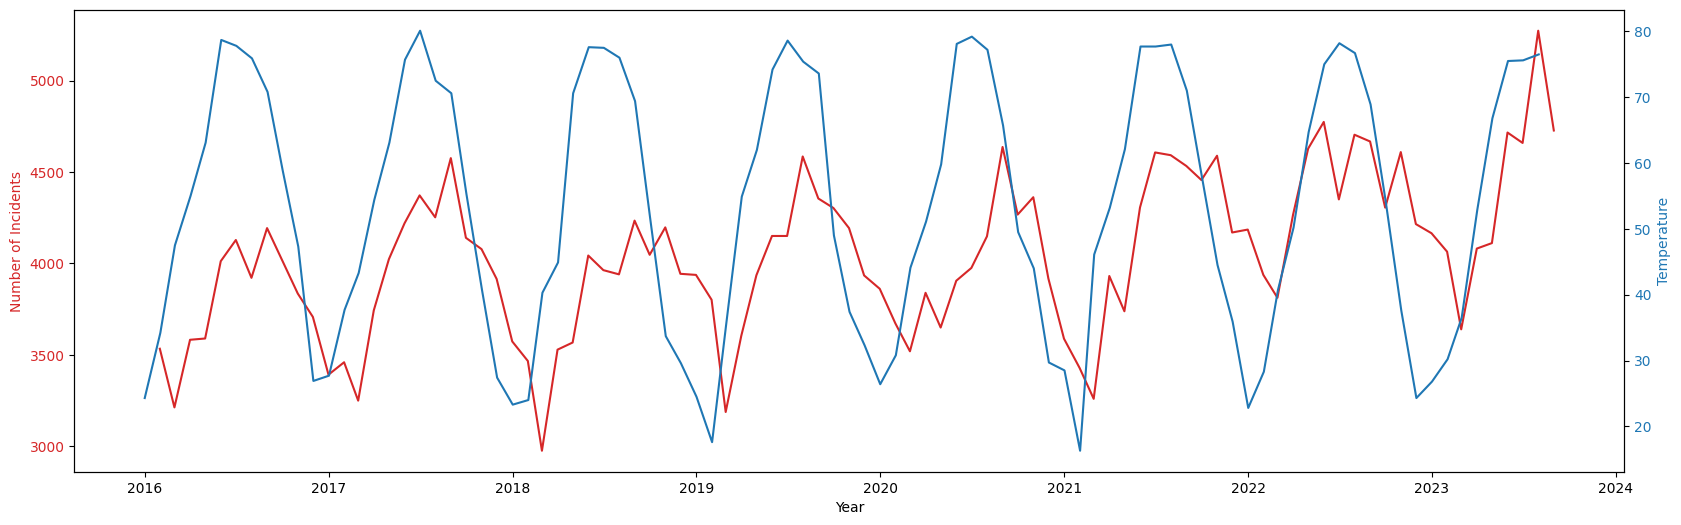

In [22]:
fig, ax1 = plt.subplots(figsize=(20,6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(crime_by_month['incident_date'], crime_by_month['incident_number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(temperature_df['date'], temperature_df['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

## The beginning of creating my first model for Assignment #4:

In [24]:
w = np.mean(crime_by_month['incident_number']/temperature_df['temp'])
print(w)

87.51594626080295


In [25]:
def first_ml_model(temp):
  return w * temp

In [26]:
temperatures = np.arange(10, 100, 10)
preds = first_ml_model(temperatures)
first_pred = pd.DataFrame({"Temp": temperatures, "Predicted # of Incidents": preds})
first_pred

,Temp,Predicted # of Incidents
0,10,875.159463
1,20,1750.318925
2,30,2625.478388
3,40,3500.637850
4,50,4375.797313
5,60,5250.956776
6,70,6126.116238
7,80,7001.275701
8,90,7876.435163


In [73]:
X = temperature_df[['temp']]
y = crime_by_month['incident_number']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

<Axes: xlabel='temp', ylabel='incident_number'>

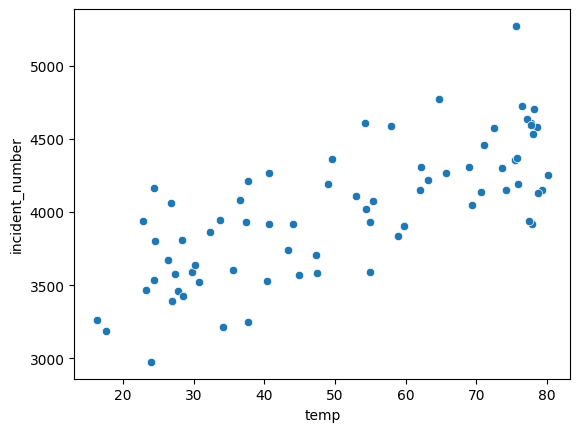

In [71]:
sns.scatterplot(x = X_train, y = y_train)

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()

ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)
#print(ml_reg.score(X_test, y_test))
print("Coefficients: \n", ml_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficients of determination (R2 Score): %.2f" % r2_score(y_test, y_pred))

#y_pred_ml_reg = ml_reg.predict(X_test)
#y_pred_ml_reg

Coefficients: 
 [16.37983879]
Mean squared error: 106565.63
Coefficients of determination (R2 Score): -0.09
